In [14]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as sns

In [15]:
# Descargar la lista de empresas del índice SP500
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500 = pd.read_html(url, header=0)[0]

# Mostrar las primeras filas de la tabla
sp500.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [16]:
# Obtenemos los símbolos de las empresas
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
symbols = sp500['Symbol'].tolist()

# Descargamos los datos de Yahoo Finance para cada símbolo
data = {}
for symbol in symbols:
    try:
        data[symbol] = yf.download(symbol, start="1990-01-01")
    except:
        pass

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [17]:
# Unimos los precios de cierre de cada símbolo en un solo DataFrame
prices = pd.concat([data[symbol]['Adj Close'] for symbol in data], axis=1)
prices.columns = symbols


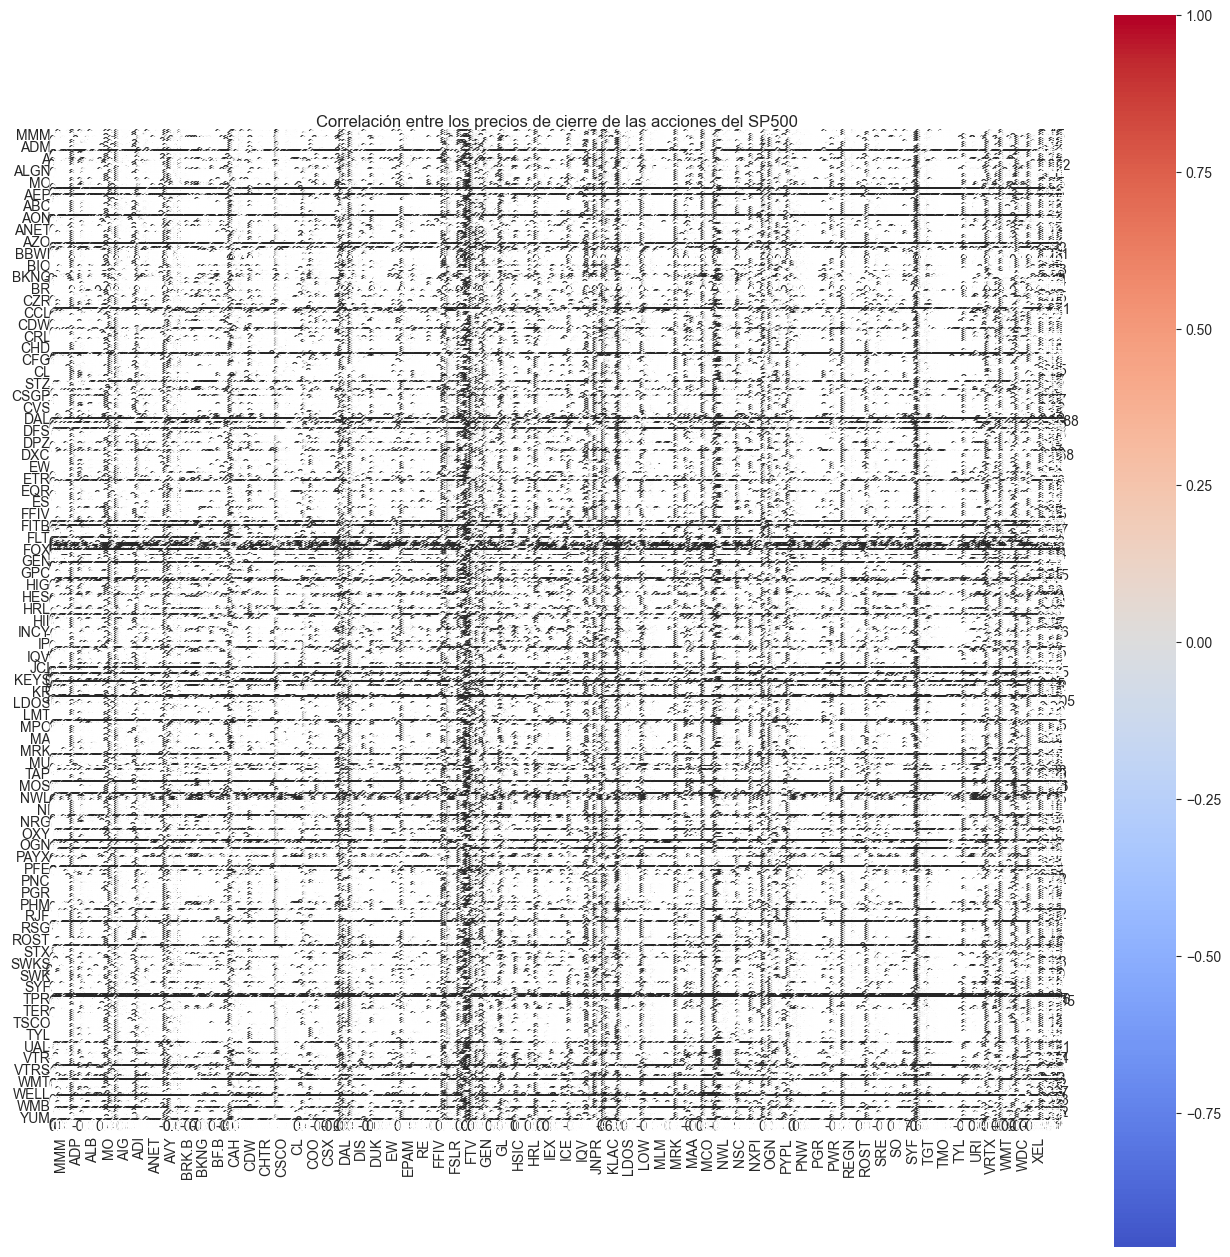

In [18]:
# Calcular la correlación entre los precios de cierre de las acciones
corr_data = prices.corr()

# Crear un mapa de calor de la correlación
plt.figure(figsize=(16, 16), dpi=100)
sns.set_style('whitegrid')
sns.heatmap(corr_data, cmap='coolwarm', center=0, square=True, annot=True)
plt.title('Correlación entre los precios de cierre de las acciones del SP500')
plt.show()

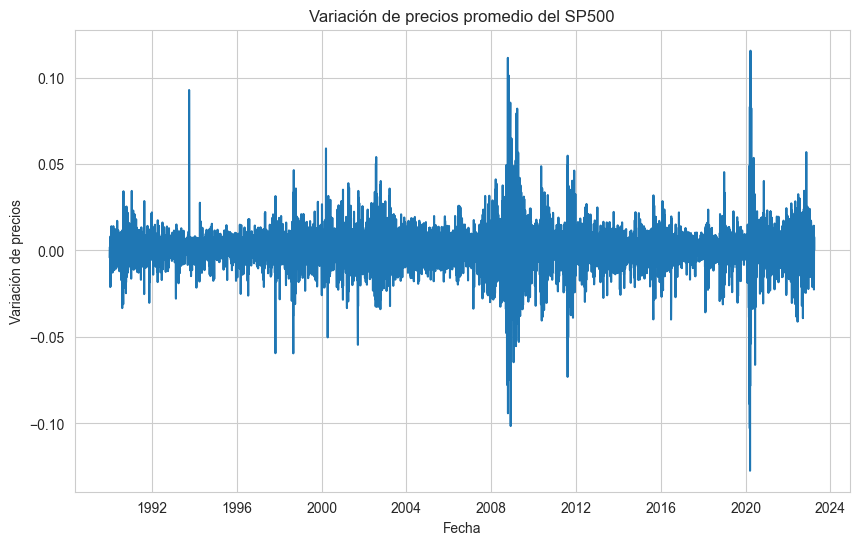

In [19]:
# Calcular la variación de precios del SP500
returns = prices.pct_change()

# Graficar las variaciones
plt.figure(figsize=(10, 6))
plt.plot(returns.index, returns.mean(axis=1))
plt.title('Variación de precios promedio del SP500')
plt.xlabel('Fecha')
plt.ylabel('Variación de precios')
plt.show()

c:\Users\andres\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


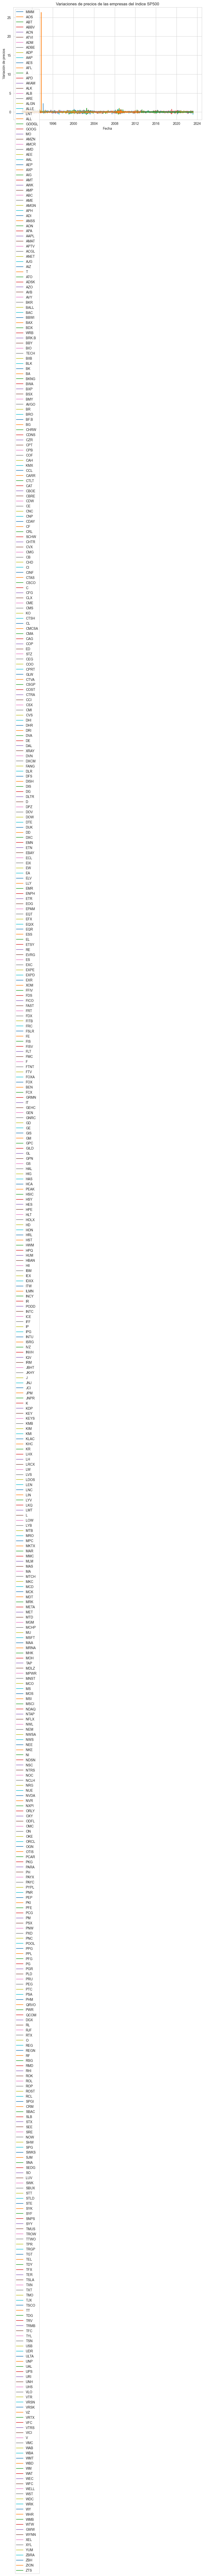

In [20]:
# Calcular la variación de precios por emppresa
returns = prices.pct_change()

# Graficar las variaciones
plt.figure(figsize=(10, 6))
for column in returns.columns:
    plt.plot(returns.index, returns[column], label=column)

plt.legend()
plt.title('Variaciones de precios de las empresas del índice SP500')
plt.xlabel('Fecha')
plt.ylabel('Variación de precios')
plt.show()


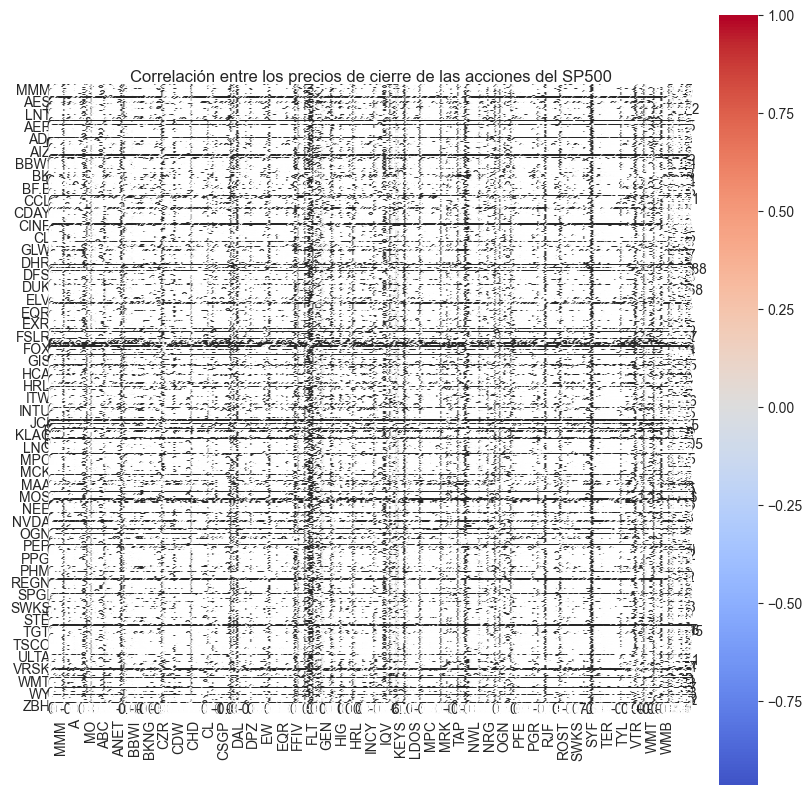

In [21]:
# Calcular la correlación entre los precios de cierre de las acciones
corr_data = prices.corr()

# Crear un mapa de calor de la correlación
plt.figure(figsize=(10, 10))
sns.heatmap(corr_data, cmap='coolwarm', center=0, square=True, annot=True)
plt.title('Correlación entre los precios de cierre de las acciones del SP500')
plt.show()

Los siguientes gráficos muestran la variación de precios de las empresas del índice SP500 divididas por sector. En lugar de mostrar todas las empresas juntas, se han agrupado por sector, lo que nos permite ver la variación de precios de cada sector por separado. Cada gráfico tiene una línea para cada empresa dentro del sector correspondiente, por lo que podemos ver cómo varían los precios de las diferentes empresas en un sector en particular. Esto puede ayudarnos a identificar patrones o tendencias dentro de los diferentes sectores.

In [22]:
# Calcular la variación de precios dentro de cada sector
grouped_returns = returns.groupby(sector_dict, axis=1).mean()

# Graficar las variaciones por sector
for sector in set(sector_dict.values()):
    sector_returns = grouped_returns.filter(like=sector)
    plt.figure(figsize=(10, 6))
    for column in sector_returns.columns:
        plt.plot(sector_returns.index, sector_returns[column], label=column)
    plt.legend()
    plt.title(f'Variaciones de precios de las empresas del sector {sector}')
    plt.xlabel('Fecha')
    plt.ylabel('Variación de precios')
    plt.show()


NameError: name 'sector_dict' is not defined